# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 12th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" in the folder "images" and visualize the RGB image as well as each of its channels separately (R, G, and B).
Note: Before applying the histogram, you should pass the image into float.

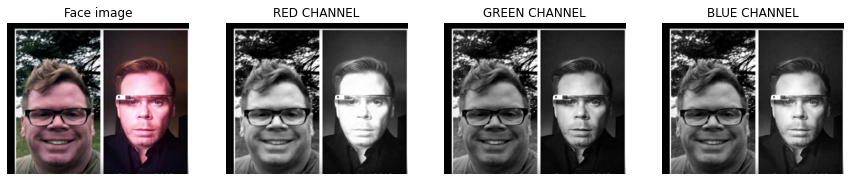

In [51]:
from skimage import io
from matplotlib import pyplot as plt

face = io.imread("images/face.png")

fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,4,1)
plt.imshow(face)
plt.title('Face image')
plt.axis("off")

fig.add_subplot(1,4,2)
plt.imshow(face[:,:,0], cmap="gray")
plt.title('RED CHANNEL')
plt.axis("off")

fig.add_subplot(1,4,3)
plt.imshow(face[:,:,1], cmap="gray")
plt.title('GREEN CHANNEL')
plt.axis("off")

fig.add_subplot(1,4,4)
plt.imshow(face[:,:,2], cmap="gray")
plt.title('BLUE CHANNEL')
plt.axis("off")

plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

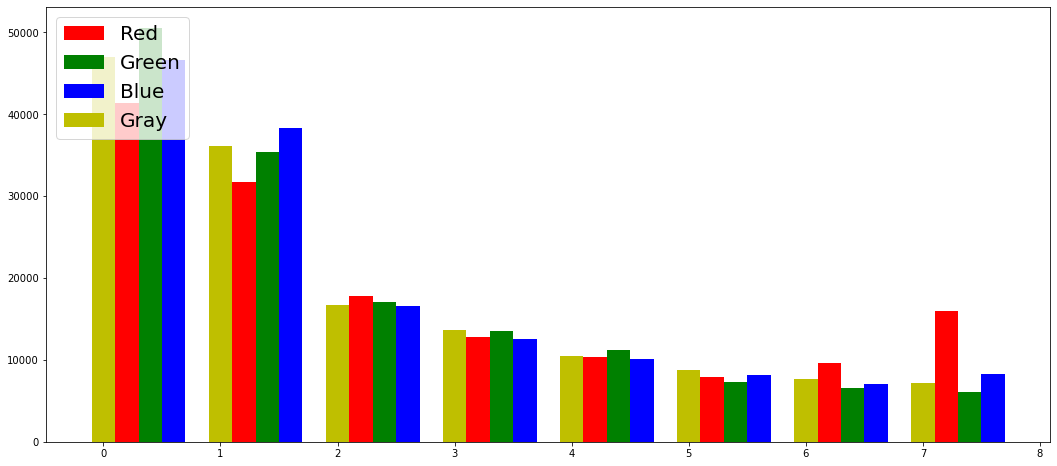

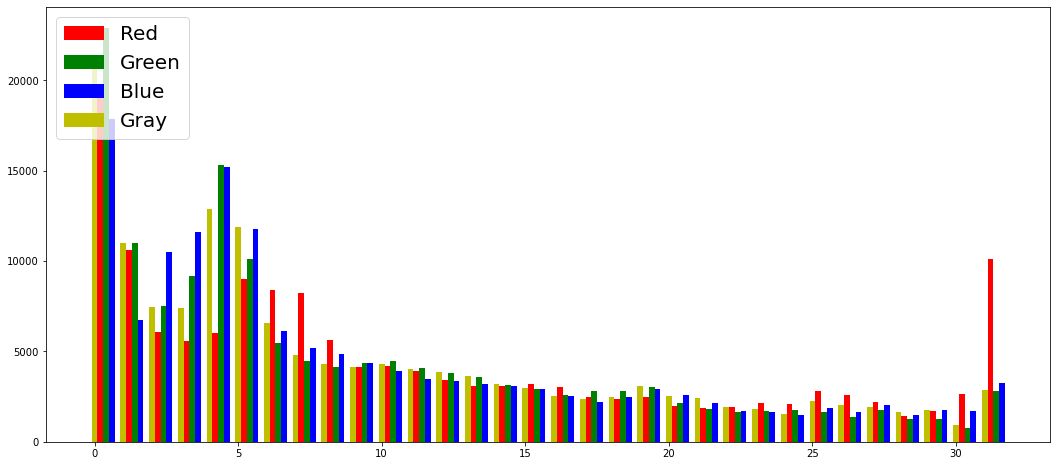

In [79]:
from skimage.exposure import histogram
from skimage import img_as_float
import numpy as np
from skimage.color import rgba2rgb, rgb2gray

#Passem a rgb per poder prendre l'escala de grisos, esta be o es pot fer diferent?
face_gray=rgb2gray(rgba2rgb(face)) 

numberOfBins = 8

hst_r, bins_r = histogram( img_as_float(face[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(face[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(face[:,:,2]), nbins=numberOfBins)
hst_gy, bins_gy = histogram( img_as_float(face_gray[:,:]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_gy = plt.bar( ind, hst_gy,0.2, color='y')
cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0], cl_gy[0]), ('Red','Green','Blue', 'Gray'), loc=2, prop={'size': 20})
plt.show()


numberOfBins = 32

hst_r, bins_r = histogram( img_as_float(face[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(face[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(face[:,:,2]), nbins=numberOfBins)
hst_gy, bins_gy = histogram( img_as_float(face_gray[:,:]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_gy = plt.bar( ind, hst_gy,0.2, color='y')
cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0], cl_gy[0]), ('Red','Green','Blue', 'Gray'), loc=2, prop={'size': 20})
plt.show()


### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the grayscale image in (1) with a transposed version of the mask in (2).
4. Convolve the grayscale image in (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

Type:  uint8 	Shape:  (350, 422) 	vMax:  255 	vMin:  0
Type:  uint8 	Shape:  (350, 422) 	vMax:  253 	vMin:  0
Type:  uint8 	Shape:  (350, 422) 	vMax:  255 	vMin:  0
Type:  uint8 	Shape:  (350, 422) 	vMax:  240 	vMin:  0


(-0.5, 421.5, 349.5, -0.5)

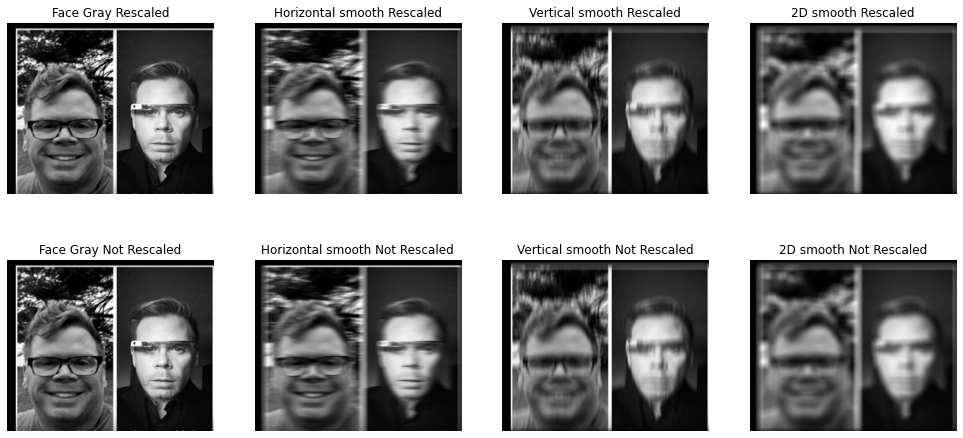

In [160]:
from scipy.ndimage import convolve

face_g=rgb2gray(rgba2rgb(face)) 

mask_1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
mask_1d = mask_1d/np.sum(mask_1d) #Normalize

mask_2d = np.ones((15,15)) 
mask_2d = mask_2d/np.sum(mask_2d) #Normalize

face_g=255.0*face_g
face_g=face_g.astype('uint8')

convolved_face_h = convolve(face_g, mask_1d, mode='constant', cval=0.0)
convolved_face_v = convolve(face_g, np.transpose(mask_1d), mode='constant', cval=0.0)
convolved_face_2d = convolve(face_g, mask_2d, mode='constant', cval=0.0)


print("Type: ", face_g.dtype, "\tShape: ", face_g.shape, "\tvMax: ", face_g.max(), "\tvMin: ", face_g.min())
print("Type: ", convolved_face_h.dtype, "\tShape: ", convolved_face_h.shape, "\tvMax: ", convolved_face_h.max(), "\tvMin: ", convolved_face_h.min())
print("Type: ", convolved_face_v.dtype, "\tShape: ", convolved_face_v.shape, "\tvMax: ", convolved_face_v.max(), "\tvMin: ", convolved_face_v.min())
print("Type: ", convolved_face_2d.dtype, "\tShape: ", convolved_face_2d.shape, "\tvMax: ", convolved_face_2d.max(), "\tvMin: ", convolved_face_2d.min())


fig = plt.figure(figsize=(17,8))

fig.add_subplot(2,4,1)
plt.imshow(face_g, cmap="gray")
plt.title('Face Gray Rescaled')
plt.axis("off")

fig.add_subplot(2,4,2)
plt.imshow(convolved_face_h, cmap="gray")
plt.title('Horizontal smooth Rescaled')
plt.axis("off")

fig.add_subplot(2,4,3)
plt.imshow(convolved_face_v, cmap="gray")
plt.title('Vertical smooth Rescaled')
plt.axis("off")

fig.add_subplot(2,4,4)
plt.imshow(convolved_face_2d, cmap="gray")
plt.title('2D smooth Rescaled')
plt.axis("off")
#------------------------------------------------------

fig.add_subplot(2,4,5)
plt.imshow(face_gray, cmap="gray", vmin=0, vmax=255)
plt.title('Face Gray Not Rescaled')
plt.axis("off")

fig.add_subplot(2,4,6)
plt.imshow(convolved_face_h, cmap="gray", vmin=0, vmax=255)
plt.title('Horizontal smooth Not Rescaled')
plt.axis("off")

fig.add_subplot(2,4,7)
plt.imshow(convolved_face_v, cmap="gray", vmin=0, vmax=255)
plt.title('Vertical smooth Not Rescaled')
plt.axis("off")

fig.add_subplot(2,4,8)
plt.imshow(convolved_face_2d, cmap="gray", vmin=0, vmax=255)
plt.title('2D smooth Not Rescaled')
plt.axis("off")


b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

NameError: name 'dasd' is not defined

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Note: Before applying the convolution assure that the color image is of 3 channels and if not use rgba2rgb().

In [3]:
#your solution

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


In [4]:
#your solution

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original image and calculate its histogram.
2. Convolve the  reduced image 10 times and calculate its histogram.
3. Convolve the  augmented image 10 times and calculate its histogram.

In [5]:
#your solution

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

In [6]:
#your solution

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [7]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [8]:
#your solution

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

In [9]:
#your solution

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [10]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

In [11]:
#your solution

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

In [12]:
#your solution

c) **(Optional)**

Compute hybrid images from other images. Apply it over color images.

In [13]:
#your solution

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

In [14]:
#your solution